# Kitsune Network Attack - Mirai Dataset 

In [1]:
## Importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Mirai Dataset - each describing the packet and the context of that packet's channel
df = pd.read_csv("Mirai_dataset.csv",index_col = 0)

#Returns first five rows of the Mirai dataset.
df.head(10)

,1.0,60.0,0.0,1.0.1,60.0.1,0.0.1,1.0.2,60.0.2,0.0.2,1.0.3,...,0.0.48,0.0.49,0.0.50,1.0.24,60.0.28,0.0.51,60.0.29,0.0.52,0.0.53,0.0.54
0,,,,,,,,,,,,,,,,,,,,,
1,1.999983,60.000000,0.000000e+00,1.999990,60.000000,9.094947e-13,1.999997,60.000000,4.547474e-13,2.000000,...,0.0,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0
2,1.000000,86.000000,0.000000e+00,1.000000,86.000000,0.000000e+00,1.000000,86.000000,0.000000e+00,1.000000,...,0.0,0.0,0.0,1.000000,86.0,0.000000e+00,86.000000,0.000000e+00,0.0,0.0
3,1.999272,86.000000,9.094947e-13,1.999563,86.000000,0.000000e+00,1.999854,86.000000,9.094947e-13,1.999985,...,0.0,0.0,0.0,1.000000,86.0,0.000000e+00,86.000000,0.000000e+00,0.0,0.0
4,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,0.0,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0
5,1.000000,74.000000,0.000000e+00,1.000000,74.000000,0.000000e+00,1.000000,74.000000,0.000000e+00,1.000000,...,0.0,0.0,0.0,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.0,0.0
6,1.000000,74.000000,0.000000e+00,1.000000,74.000000,0.000000e+00,1.000000,74.000000,0.000000e+00,1.000000,...,0.0,0.0,0.0,1.000000,74.0,0.000000e+00,104.651804,0.000000e+00,0.0,0.0
7,1.000000,117.000000,0.000000e+00,1.000000,117.000000,0.000000e+00,1.000000,117.000000,0.000000e+00,1.000000,...,0.0,0.0,0.0,1.000000,117.0,0.000000e+00,117.000000,0.000000e+00,0.0,0.0
8,1.407285,108.028231,1.976322e+02,1.769752,103.516574,2.361834e+02,2.454801,98.628313,2.320034e+02,2.937347,...,0.0,0.0,0.0,1.000000,117.0,0.000000e+00,165.462987,0.000000e+00,0.0,0.0
9,1.351209,60.000000,0.000000e+00,1.704290,60.000000,4.547474e-13,2.412333,60.000000,9.094947e-13,2.931616,...,0.0,0.0,0.0,1.996527,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0


In [3]:
# Changing the attribute numbers to names.
df.columns=["X"+str(i) for i in range(1, 116)]
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115
0,,,,,,,,,,,,,,,,,,,,,
1,1.999983,60.0,0.000000e+00,1.999990,60.0,9.094947e-13,1.999997,60.0,4.547474e-13,2.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
2,1.000000,86.0,0.000000e+00,1.000000,86.0,0.000000e+00,1.000000,86.0,0.000000e+00,1.000000,...,0.0,0.0,0.0,1.0,86.0,0.0,86.0,0.0,0.0,0.0
3,1.999272,86.0,9.094947e-13,1.999563,86.0,0.000000e+00,1.999854,86.0,9.094947e-13,1.999985,...,0.0,0.0,0.0,1.0,86.0,0.0,86.0,0.0,0.0,0.0
4,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
5,1.000000,74.0,0.000000e+00,1.000000,74.0,0.000000e+00,1.000000,74.0,0.000000e+00,1.000000,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0


In [4]:
# Importing the Mirai labels - indicates whether the packet is malicious or not.
df1 = pd.read_csv("mirai_labels.csv")

#Returns First five rows of the Mirai label dataset.
df1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [5]:
# Merging Mirai datasets with corresponding Mirai Labels
data=df1.merge(df,left_index=True, right_index=True)

# Renaming the Label dataset attribute as "label"
data.rename(columns={'0':'label'}, inplace=True)

Mirai=data
# Returns the first five rows of the dataset
data.head()

,label,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115
1,0,1.999983,60.0,0.000000e+00,1.999990,60.0,9.094947e-13,1.999997,60.0,4.547474e-13,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
2,0,1.000000,86.0,0.000000e+00,1.000000,86.0,0.000000e+00,1.000000,86.0,0.000000e+00,...,0.0,0.0,0.0,1.0,86.0,0.0,86.0,0.0,0.0,0.0
3,0,1.999272,86.0,9.094947e-13,1.999563,86.0,0.000000e+00,1.999854,86.0,9.094947e-13,...,0.0,0.0,0.0,1.0,86.0,0.0,86.0,0.0,0.0,0.0
4,0,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
5,0,1.000000,74.0,0.000000e+00,1.000000,74.0,0.000000e+00,1.000000,74.0,0.000000e+00,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0


In [6]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764135 entries, 1 to 764135
Columns: 116 entries, label to X115
dtypes: float64(115), int64(1)
memory usage: 682.1 MB


In [7]:
# Check the Data stats:
data.describe()

,label,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115
count,764135.000000,764135.000000,764135.000000,764135.000000,764135.000000,764135.000000,764135.000000,764135.000000,764135.000000,764135.000000,...,7.641350e+05,764135.000000,764135.000000,764135.000000,764135.000000,764135.000000,764135.000000,7.641350e+05,764135.000000,764135.000000
mean,0.840841,62.350842,66.254961,70.099202,89.739233,66.271657,94.559846,240.176311,66.290615,143.848852,...,4.556570e+00,-0.000486,-0.000098,20698.438700,66.377100,0.237334,68.730473,5.130040e+00,0.004659,0.000091
std,0.365825,44.615792,17.588507,1131.777296,59.838413,16.923828,1343.726503,141.576086,15.456473,1625.712602,...,7.694632e+01,0.649534,0.014717,13574.991870,19.792485,2.114586,23.244443,8.699060e+01,0.634564,0.009265
min,0.000000,1.000000,42.000002,0.000000,1.000000,42.002371,0.000000,1.000000,44.291508,0.000000,...,0.000000e+00,-65.889400,-1.057362,1.000000,42.000000,0.000000,42.000000,0.000000e+00,-73.598530,-0.749841
25%,1.000000,7.951423,60.024847,0.236594,10.293483,60.051336,0.592573,22.328584,60.097114,1.363974,...,1.818989e-12,0.000000,0.000000,158.586171,60.000000,0.000002,60.000000,3.637979e-12,0.000000,0.000000
50%,1.000000,68.425378,60.078346,0.783347,100.562408,60.110449,1.338655,298.393033,60.135587,1.999525,...,6.366463e-12,0.000000,0.000000,30562.680453,60.000000,0.000004,60.000000,1.682565e-11,0.000000,0.000000
75%,1.000000,103.520470,60.745052,2.929833,142.195277,60.586338,3.576456,344.376783,61.129885,3.531303,...,1.409717e-11,0.000000,0.000000,30737.931085,60.000000,0.000007,72.000000,4.501999e-11,0.000000,0.000000
max,1.000000,144.071660,624.117403,442869.250128,195.788049,590.000000,400508.594984,425.179960,590.000000,265238.697696,...,1.455177e+04,92.778945,0.800243,30875.637639,1468.000000,130.141937,1468.000000,1.693692e+04,102.044062,0.875271


# Data Visualization

### (1) - HeatMap

In [8]:
# Heatmap between some of the features and Labels:
label_all = list(data.shape)[0]
label_categories = list(data['label'].value_counts())

print("\n \t The data has {} labels, {} malignant and {} benign.".format(label_all, label_categories[0],label_categories[1]))


 	 The data has 764135 labels, 642516 malignant and 121619 benign.


In [9]:
# Selecting first few features:
features= list(data.columns[1:15])

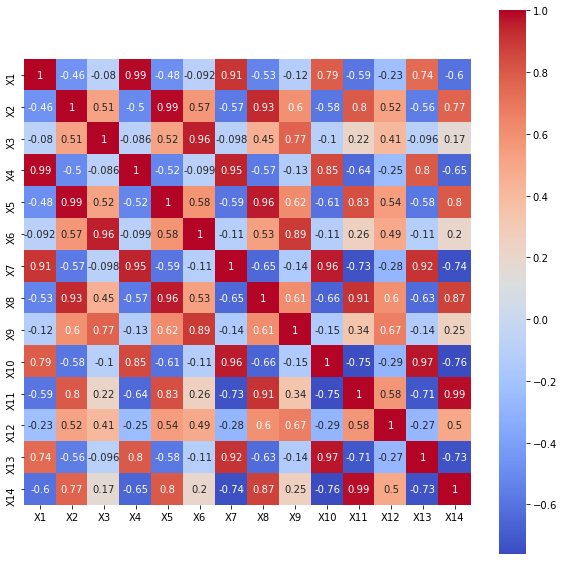

In [10]:
# Plotting Heatmap:
plt.figure(figsize=(10,10))
sns.heatmap(data[features].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

### (2) - Histogram

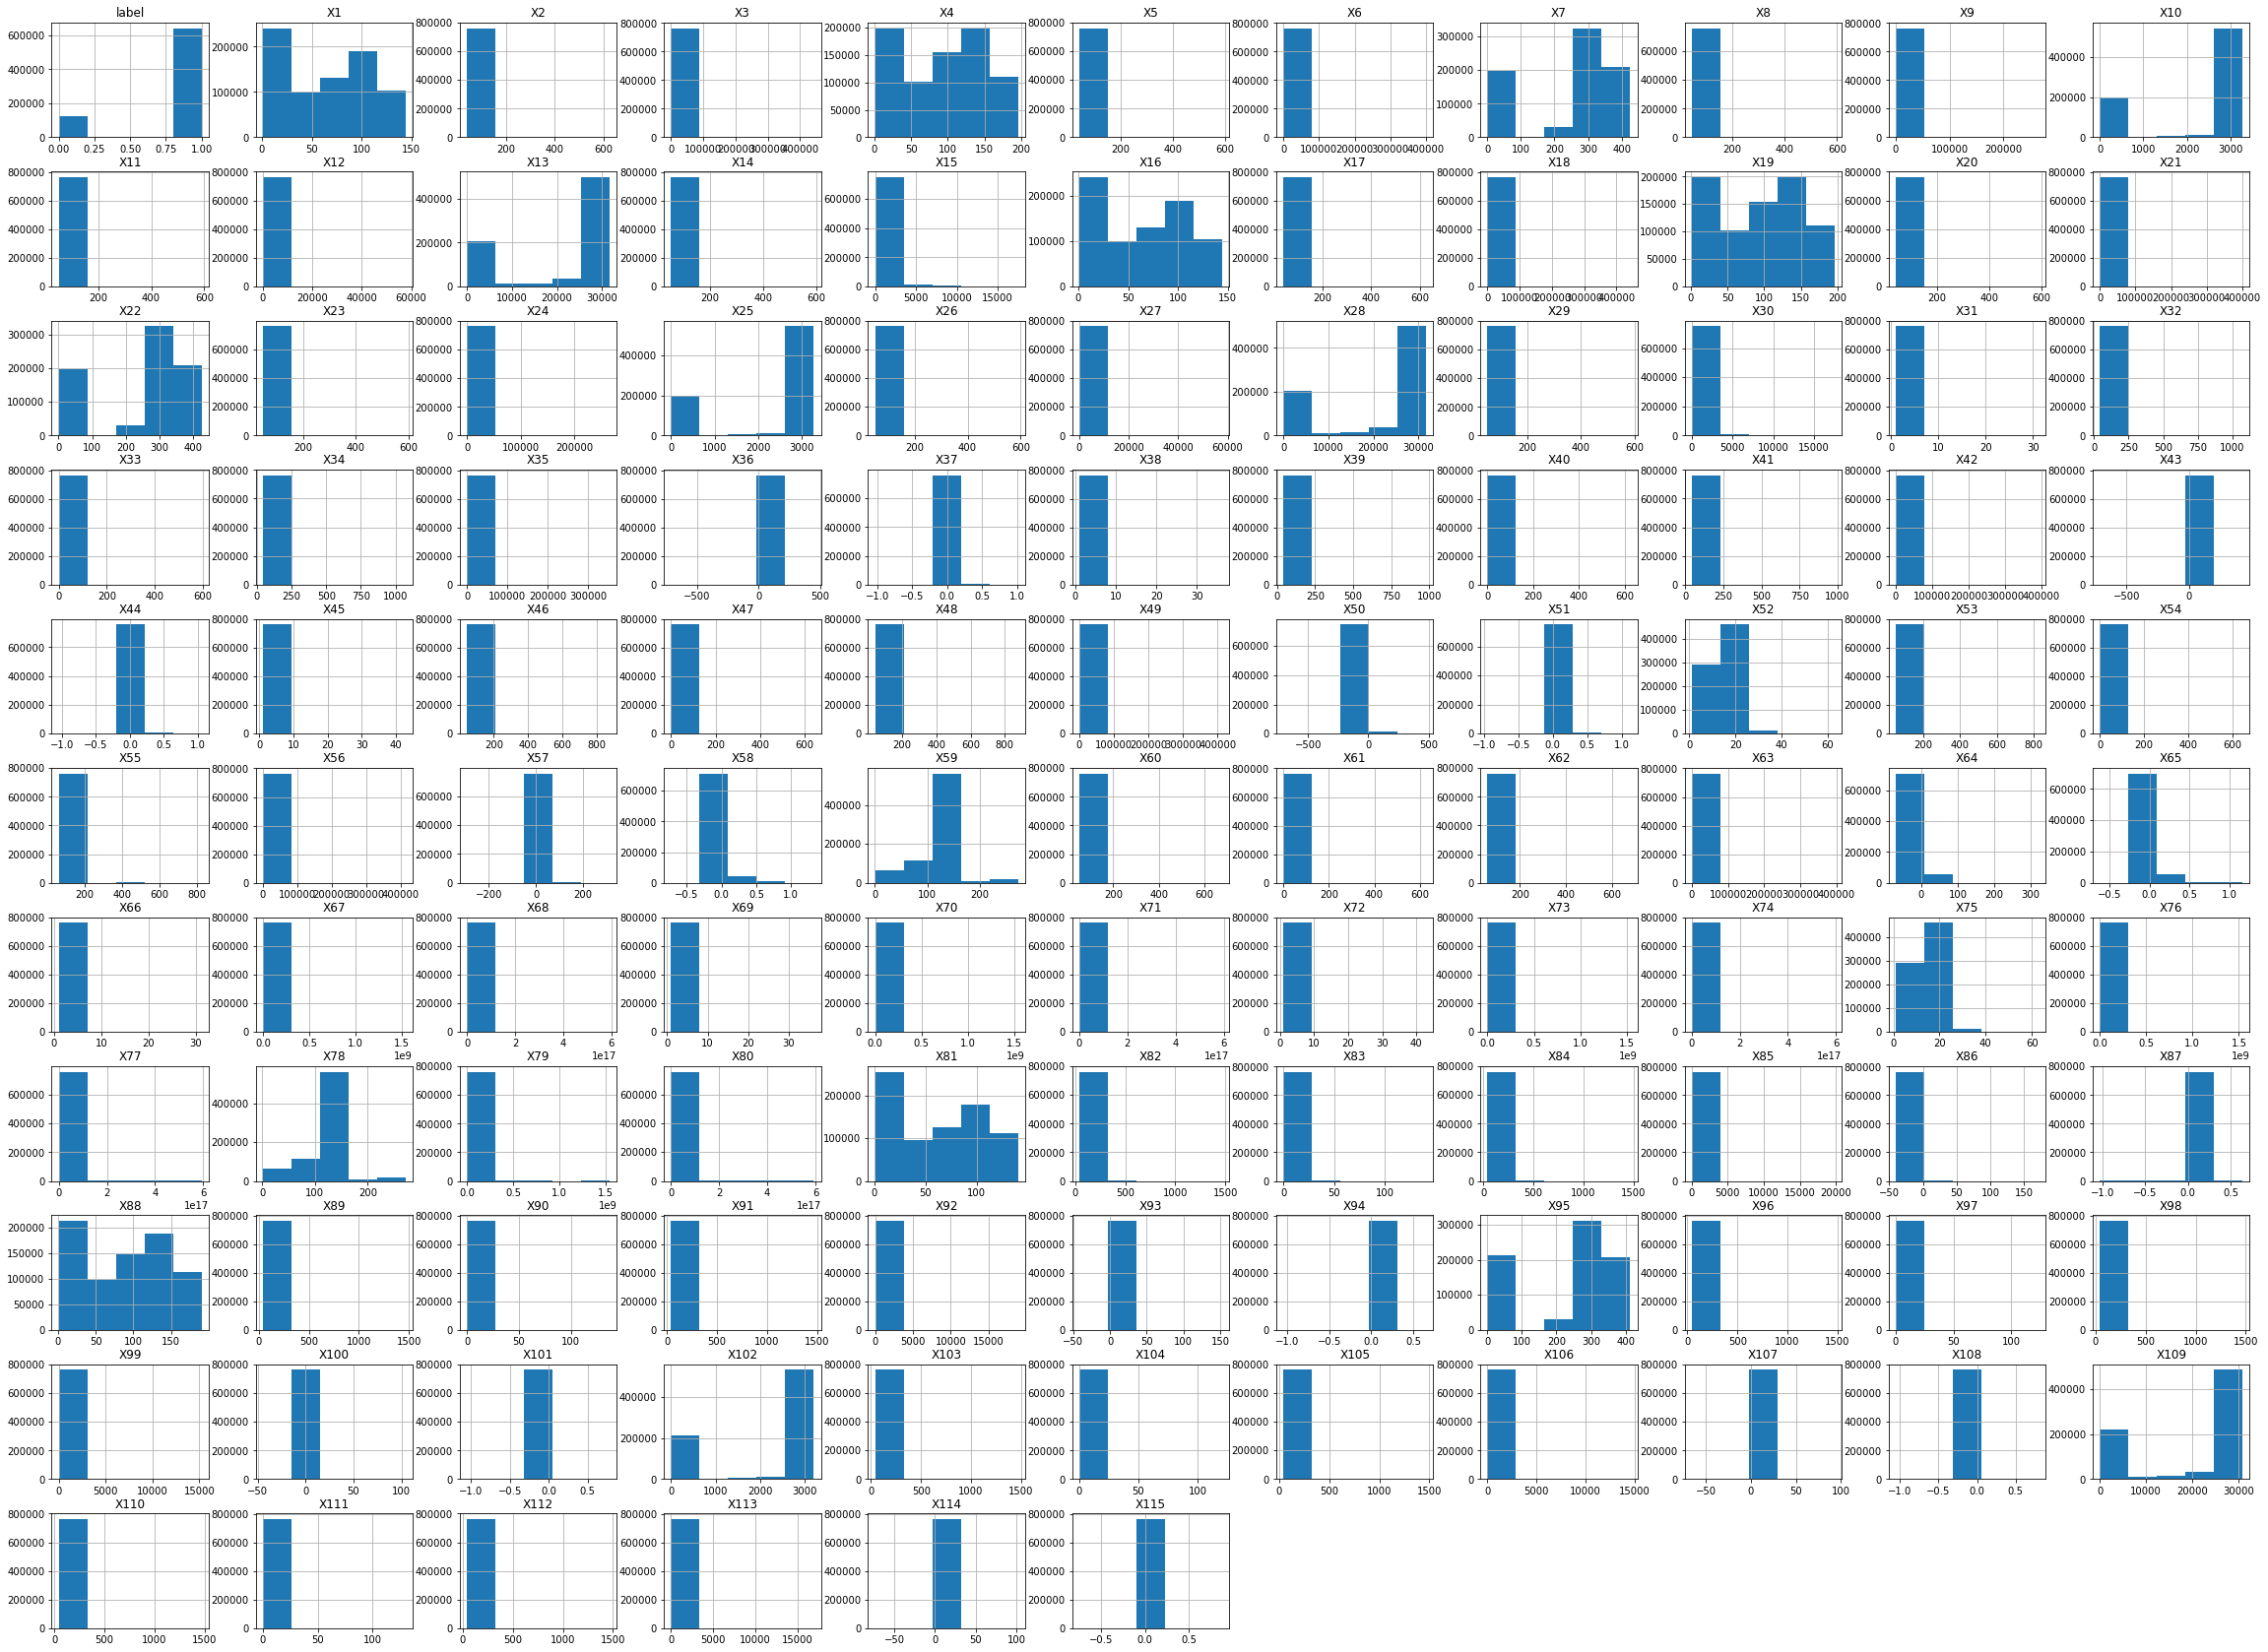

In [11]:
# Histogram for all 115 attributes:
data.hist(bins=5, figsize=(40,30))
plt.show()

### (3)- Scatter Matrix

array([[<AxesSubplot:xlabel='X1', ylabel='X1'>,
        <AxesSubplot:xlabel='X2', ylabel='X1'>,
        <AxesSubplot:xlabel='X3', ylabel='X1'>,
        <AxesSubplot:xlabel='X4', ylabel='X1'>,
        <AxesSubplot:xlabel='X5', ylabel='X1'>],
       [<AxesSubplot:xlabel='X1', ylabel='X2'>,
        <AxesSubplot:xlabel='X2', ylabel='X2'>,
        <AxesSubplot:xlabel='X3', ylabel='X2'>,
        <AxesSubplot:xlabel='X4', ylabel='X2'>,
        <AxesSubplot:xlabel='X5', ylabel='X2'>],
       [<AxesSubplot:xlabel='X1', ylabel='X3'>,
        <AxesSubplot:xlabel='X2', ylabel='X3'>,
        <AxesSubplot:xlabel='X3', ylabel='X3'>,
        <AxesSubplot:xlabel='X4', ylabel='X3'>,
        <AxesSubplot:xlabel='X5', ylabel='X3'>],
       [<AxesSubplot:xlabel='X1', ylabel='X4'>,
        <AxesSubplot:xlabel='X2', ylabel='X4'>,
        <AxesSubplot:xlabel='X3', ylabel='X4'>,
        <AxesSubplot:xlabel='X4', ylabel='X4'>,
        <AxesSubplot:xlabel='X5', ylabel='X4'>],
       [<AxesSubplot:xlabel='X1', yl

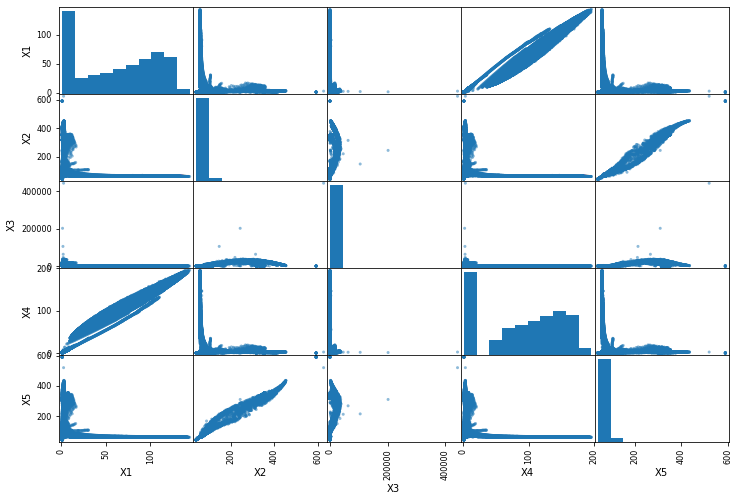

In [12]:
# Scatter matrix for first few features:
from pandas.plotting import scatter_matrix
attributes = ["X1", "X2","X3", "X4","X5"]
scatter_matrix(data[attributes], figsize=(12, 8))


### (4)- Box Plot

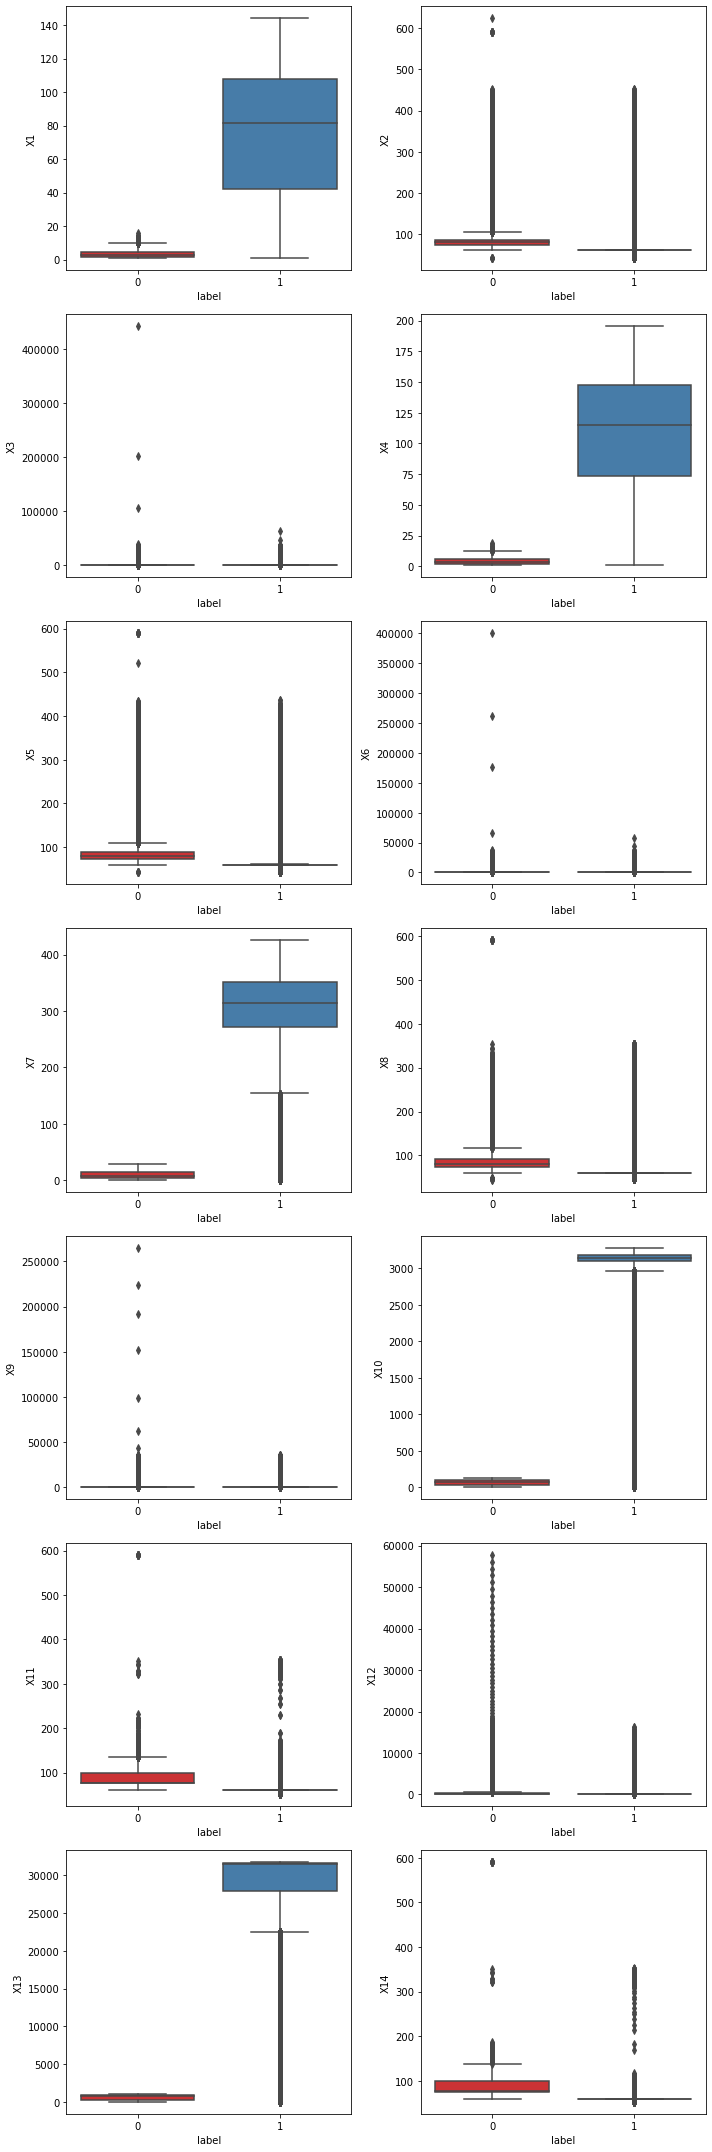

In [13]:
##Box Plot

plt.figure(figsize=(10,30))
for i, feature in enumerate(features):
    rows = int(len(features)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='label', y=feature, data=data, palette="Set1")

plt.tight_layout()
plt.show()

### (5)- Seaborn's StripPlot

<Figure size 432x288 with 0 Axes>

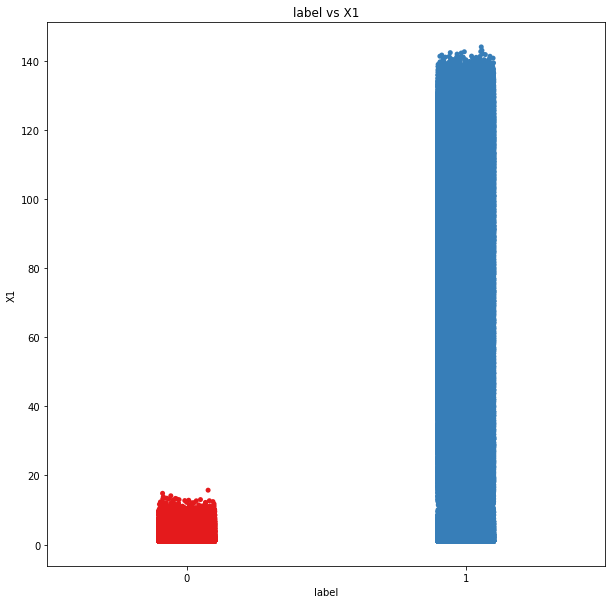

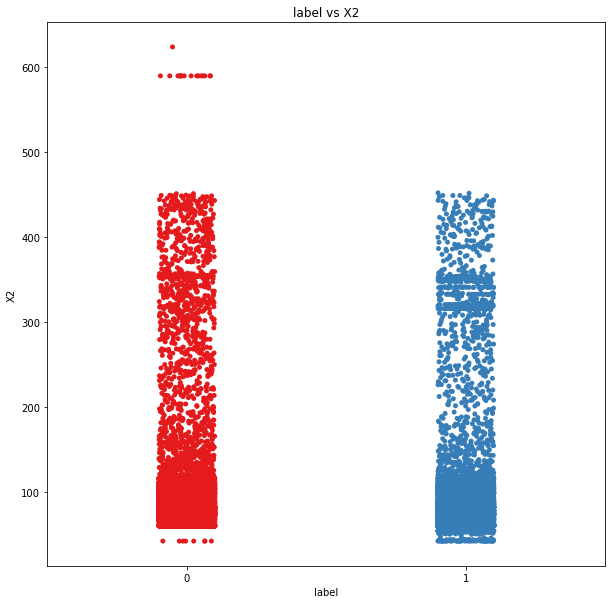

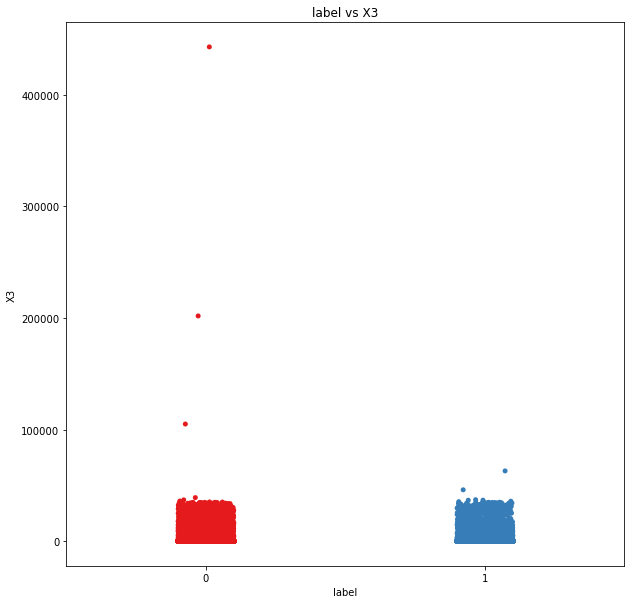

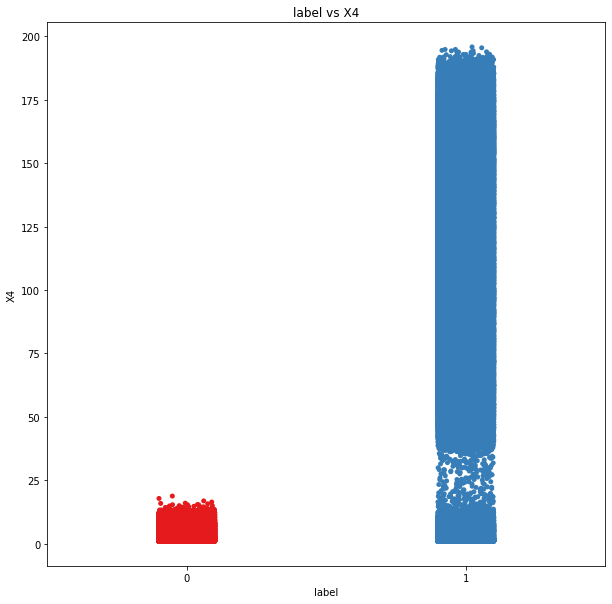

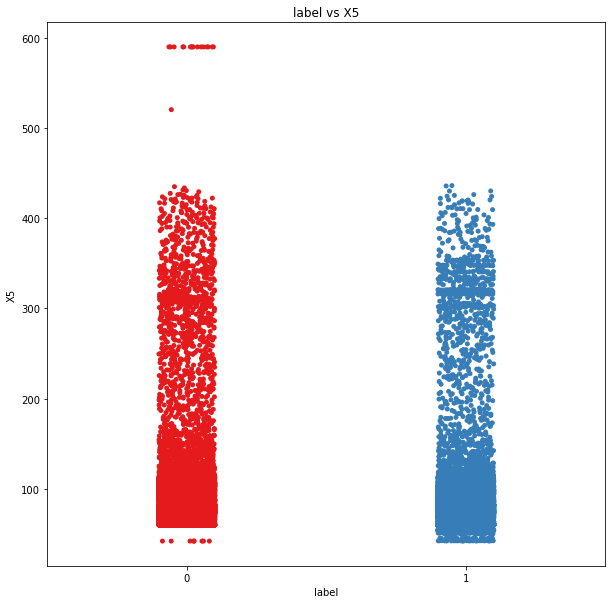

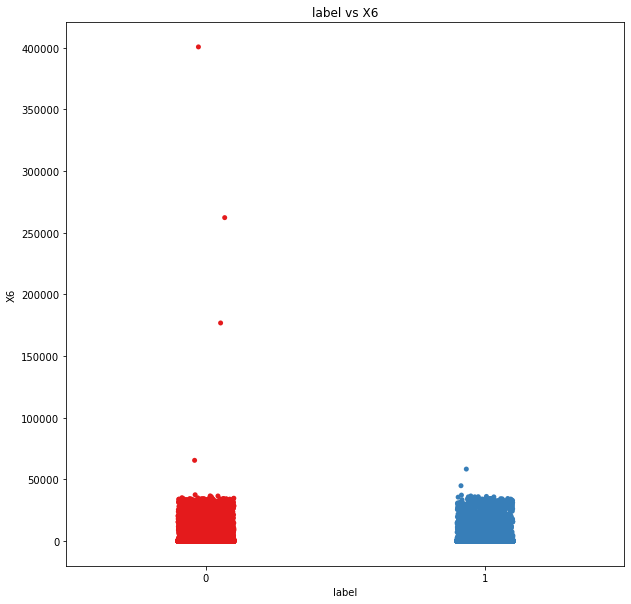

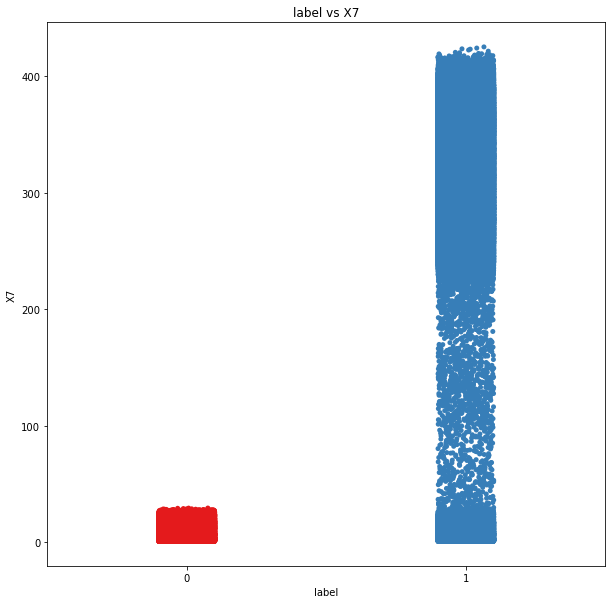

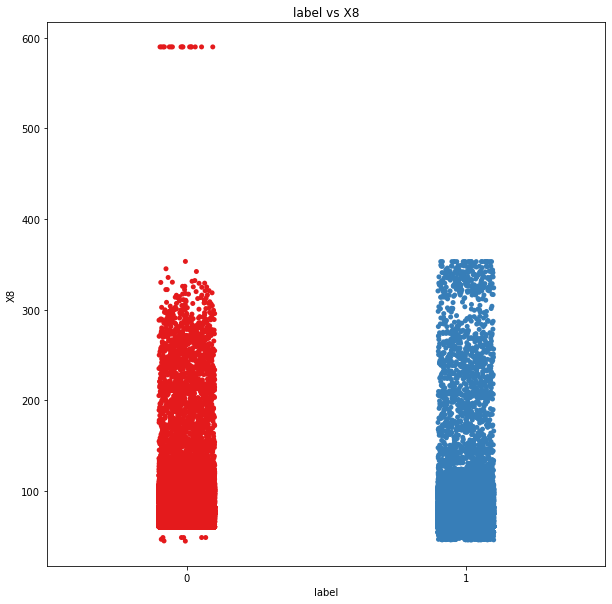

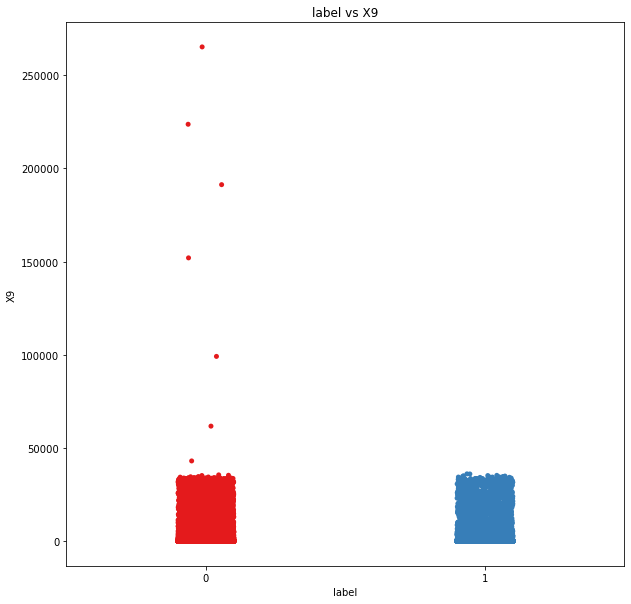

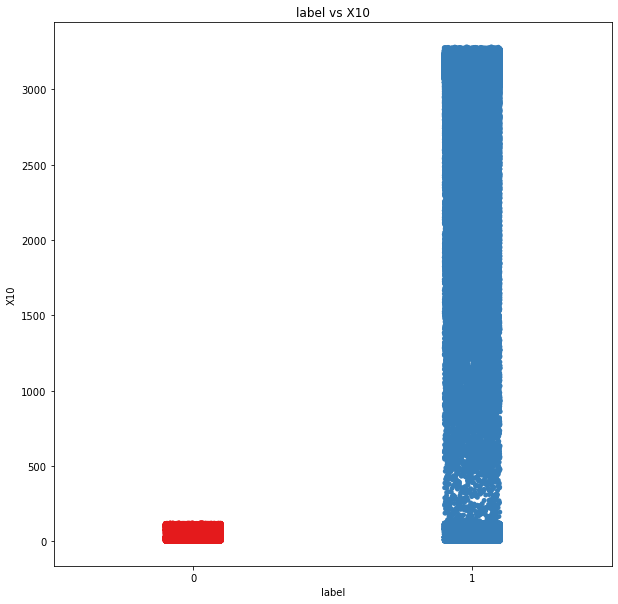

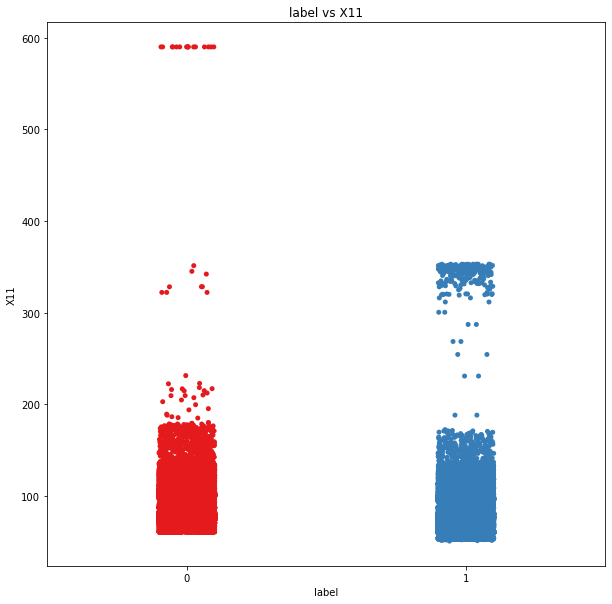

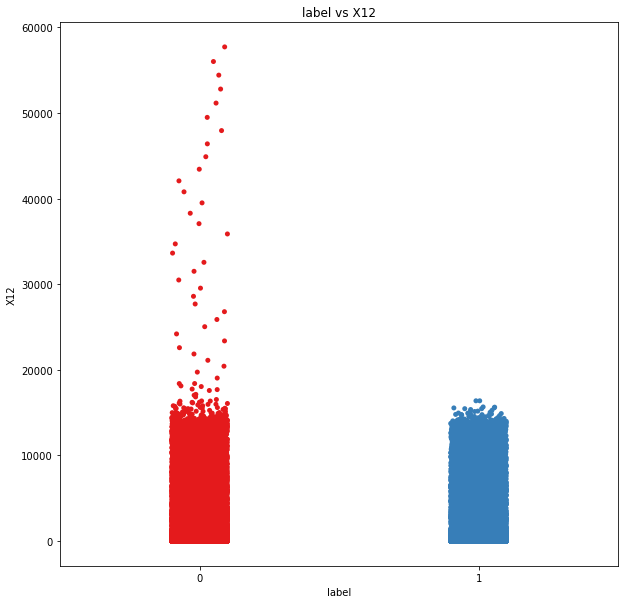

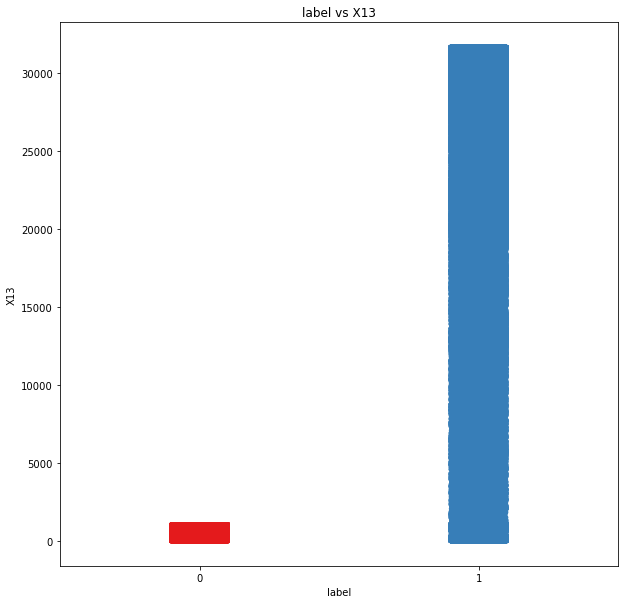

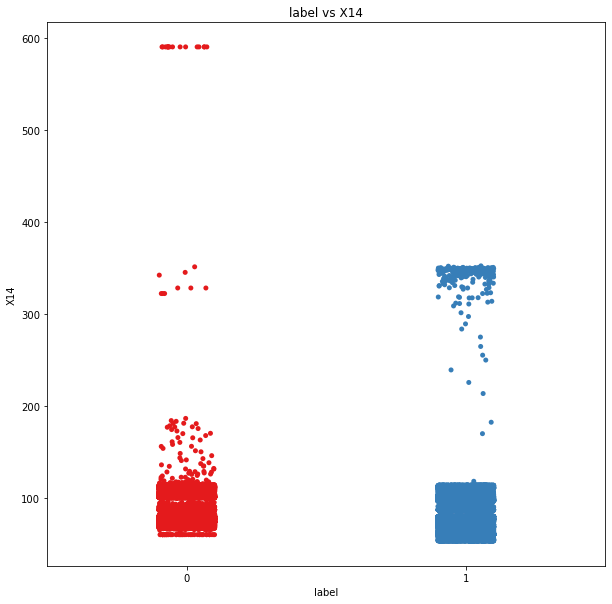

In [14]:
# Seaborn's Stripplot 
data_drop = data.drop('label',axis=1)
data_drop = data_drop[features]
for index,columns in enumerate(data_drop):
    plt.figure(index)
    plt.figure(figsize=(10,10))
    sns.stripplot(x='label', y= columns, data= data, jitter=True, palette = 'Set1');
    plt.title('label vs ' + str(columns))

In [15]:
## Correlation Matrix
corr_matrix = data.corr()
corr_matrix

,label,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115
label,1.000000,0.576731,-0.447572,-0.071328,0.621752,-0.465393,-0.082531,0.709952,-0.509313,-0.106132,...,-0.054073,-0.004569,-0.006244,0.661653,-0.403420,-0.132432,-0.425672,-0.054688,-0.001356,-0.001135
X1,0.576731,1.000000,-0.464978,-0.080057,0.992467,-0.482970,-0.091506,0.908517,-0.527922,-0.115944,...,-0.076180,0.001630,0.007113,0.699142,-0.417877,-0.148517,-0.455479,-0.075930,-0.008656,-0.011796
X2,-0.447572,-0.464978,1.000000,0.513064,-0.500888,0.992758,0.572301,-0.570969,0.933067,0.596428,...,0.268876,-0.000637,-0.004961,-0.532286,0.943522,0.439434,0.881327,0.297313,0.006069,0.009914
X3,-0.071328,-0.080057,0.513064,1.000000,-0.086200,0.517779,0.956006,-0.098288,0.453212,0.767843,...,0.122219,0.000647,-0.000853,-0.091529,0.489650,0.230836,0.441412,0.114203,0.004549,0.003113
X4,0.621752,0.992467,-0.500888,-0.086200,1.000000,-0.520474,-0.098630,0.950058,-0.569148,-0.125093,...,-0.082483,0.002297,0.008748,0.752566,-0.449820,-0.160595,-0.490284,-0.082397,-0.009083,-0.012304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X111,-0.132432,-0.148517,0.439434,0.230836,-0.160595,0.446323,0.265471,-0.183923,0.454551,0.323609,...,0.654278,-0.022200,-0.098434,-0.171032,0.451334,1.000000,0.547678,0.693224,0.057353,0.041743
X112,-0.425672,-0.455479,0.881327,0.441412,-0.490284,0.867063,0.487899,-0.562825,0.823643,0.515842,...,0.314318,0.003960,-0.009714,-0.571325,0.924669,0.547678,1.000000,0.325965,0.020354,0.026593
X113,-0.054688,-0.075930,0.297313,0.114203,-0.082397,0.302379,0.129027,-0.095073,0.309210,0.153217,...,0.863250,-0.117352,-0.243292,-0.089796,0.289983,0.693224,0.325965,1.000000,0.063609,0.033419
X114,-0.001356,-0.008656,0.006069,0.004549,-0.009083,0.006805,0.004539,-0.010121,0.008163,0.004368,...,0.056196,0.842800,0.516712,-0.011178,0.008583,0.057353,0.020354,0.063609,1.000000,0.810763


# Handling Outliers

In [16]:
# Handling Outliers:

from scipy import stats
import numpy as np
X = df.iloc[:, 1: ]
z = np.abs(stats.zscore(X))
print(z)

[[0.35563004 0.06193733 1.46626746 ... 0.05897234 0.00734255 0.00980574]
 [1.12260174 0.06193733 1.48297896 ... 0.05897234 0.00734255 0.00980574]
 [1.12260174 0.06193733 1.46627458 ... 0.05897234 0.00734255 0.00980574]
 ...
 [0.34608295 0.0590653  0.60784421 ... 0.05897234 0.00734255 0.00980574]
 [0.34652563 0.05919737 0.59438706 ... 0.05897234 0.00734255 0.00980574]
 [2.91085256 0.01852978 1.47743809 ... 0.05897234 0.00734255 0.00980574]]


In [17]:
print(np.count_nonzero(z > 2))
threshold = 2
print(np.where(z>2))

1792043
(array([     0,      0,      0, ..., 764135, 764135, 764135]), array([ 50,  57,  65, ..., 103, 108, 110]))


In [18]:
ds = X[(z < 2).all(axis=1)]
print(ds.shape)
print(ds.index)

(627300, 114)
Int64Index([  1237,   1238,   1239,   1246,   1247,   1248,   1258,   1259,
              1260,   1261,
            ...
            764125, 764127, 764128, 764129, 764130, 764131, 764132, 764133,
            764134, 764135],
           dtype='int64', name='0', length=627300)


In [19]:
### ***Alternative code for removing outliers*** ###

#X = data.iloc[:, 1: ]
#Q1 = X.quantile(0.25)
#Q3 = X.quantile(0.75)
#IQR = Q3 - Q1

#print(IQR)
#print(X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))
#print(X['X1'].skew())

#X['X1'].describe()

#ds = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]
#print(df_out.shape)

In [20]:
## Merging the data with it corresponding labels.
ds_new = pd.merge(data, ds, how='inner', left_index=True, right_index=True, suffixes=('', '_drop'))

ds_new.drop([col for col in ds_new.columns if 'drop' in col], axis=1, inplace=True)

In [21]:
r1 = pd.merge(data, ds, how='inner', left_index=True, right_index=True, suffixes=('', '_drop'))

r1.drop([col for col in r1.columns if 'drop' in col], axis=1, inplace=True)

In [22]:
ds_new.index = np.arange(1, len(ds_new)+1)
ds_new.head()
r1.index = np.arange(1, len(ds_new)+1)
r1.head()

,label,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115
1,0,2.060333,81.974502,0.560309,3.650722,81.690992,6.702692,10.512463,78.860455,59.213252,...,4.547474e-12,0.0,0.0,41.373578,82.0,1.651812e-06,82.0,2.728484e-12,0.0,0.0
2,0,3.059106,81.982837,0.377291,4.649417,81.757454,5.277193,11.511211,79.133193,54.851175,...,2.728484e-12,0.0,0.0,41.373681,82.0,9.536743e-07,82.0,9.094947e-13,0.0,0.0
3,0,4.059086,81.987065,0.284396,5.649399,81.800387,4.351647,12.511196,79.362332,51.071401,...,1.818989e-12,0.0,0.0,41.373781,82.0,0.000000e+00,82.0,0.000000e+00,0.0,0.0
4,0,2.083785,81.995493,0.099129,3.723634,81.892169,2.360665,11.285141,79.927384,41.301818,...,2.728484e-12,0.0,0.0,42.231357,82.0,1.651812e-06,82.0,2.728484e-12,0.0,0.0
5,0,3.082508,81.996955,0.066975,4.722265,81.915003,1.862705,12.283757,80.096112,38.260746,...,3.637979e-12,0.0,0.0,42.231458,82.0,0.000000e+00,82.0,0.000000e+00,0.0,0.0


In [23]:
ds_new['label'].replace(0, 'Benign',inplace=True)
ds_new['label'].replace(1, 'Malignant',inplace=True)
ds_new.reset_index(drop=True)

,label,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115
0,Benign,2.060333,81.974502,0.560309,3.650722,81.690992,6.702692,10.512463,78.860455,59.213252,...,4.547474e-12,0.0,0.0,41.373578,82.0,1.651812e-06,82.0,2.728484e-12,0.0,0.0
1,Benign,3.059106,81.982837,0.377291,4.649417,81.757454,5.277193,11.511211,79.133193,54.851175,...,2.728484e-12,0.0,0.0,41.373681,82.0,9.536743e-07,82.0,9.094947e-13,0.0,0.0
2,Benign,4.059086,81.987065,0.284396,5.649399,81.800387,4.351647,12.511196,79.362332,51.071401,...,1.818989e-12,0.0,0.0,41.373781,82.0,0.000000e+00,82.0,0.000000e+00,0.0,0.0
3,Benign,2.083785,81.995493,0.099129,3.723634,81.892169,2.360665,11.285141,79.927384,41.301818,...,2.728484e-12,0.0,0.0,42.231357,82.0,1.651812e-06,82.0,2.728484e-12,0.0,0.0
4,Benign,3.082508,81.996955,0.066975,4.722265,81.915003,1.862705,12.283757,80.096112,38.260746,...,3.637979e-12,0.0,0.0,42.231458,82.0,0.000000e+00,82.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627295,Malignant,17.976054,60.196229,3.792923,50.833585,60.186244,3.560455,256.614686,60.137672,2.465194,...,5.911716e-12,0.0,0.0,30681.403658,60.0,3.932100e-06,60.0,1.546141e-11,0.0,0.0
627296,Malignant,18.897961,60.185845,3.594147,51.700968,60.182642,3.492246,257.391336,60.137137,2.455690,...,5.456968e-12,0.0,0.0,30682.136500,60.0,3.932100e-06,60.0,1.546141e-11,0.0,0.0
627297,Malignant,19.775173,60.176447,3.414055,52.499151,60.179163,3.426350,258.055986,60.136606,2.446246,...,4.547474e-12,0.0,0.0,30682.736491,60.0,3.873843e-06,60.0,1.500666e-11,0.0,0.0
627298,Malignant,20.692078,60.167920,3.250494,53.366680,60.175805,3.362736,258.838753,60.136078,2.436867,...,5.002221e-12,0.0,0.0,30683.478094,60.0,3.932100e-06,60.0,1.546141e-11,0.0,0.0


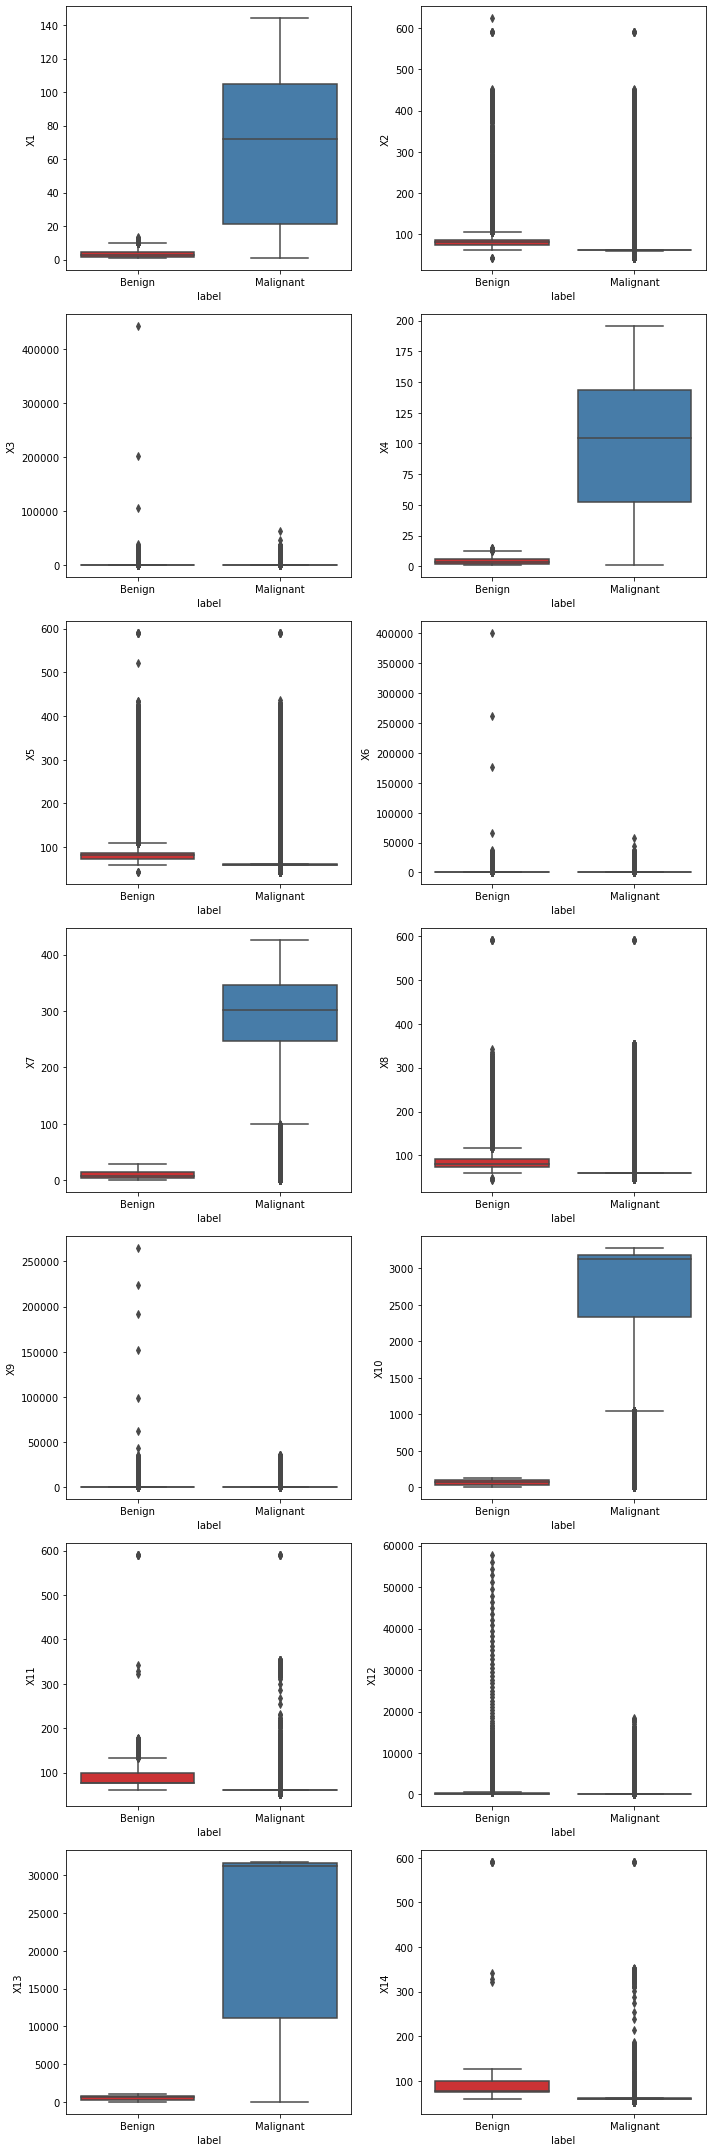

In [24]:
features= list(ds_new.columns[1:15])

#Plotting BoxPlot to check the outliers

plt.figure(figsize=(10,30))
for i, feature in enumerate(features):
    rows = int(len(features)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x=ds_new.label, y=feature, data=data, palette="Set1")

plt.tight_layout()
plt.show()

# Feature Extraction using PCA

### PCA - Principal Component Analysis

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = ds_new.iloc[:, 1:]
x.reset_index(drop=True)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115
0,2.060333,81.974502,0.560309,3.650722,81.690992,6.702692,10.512463,78.860455,59.213252,95.413232,...,4.547474e-12,0.0,0.0,41.373578,82.0,1.651812e-06,82.0,2.728484e-12,0.0,0.0
1,3.059106,81.982837,0.377291,4.649417,81.757454,5.277193,11.511211,79.133193,54.851175,96.412095,...,2.728484e-12,0.0,0.0,41.373681,82.0,9.536743e-07,82.0,9.094947e-13,0.0,0.0
2,4.059086,81.987065,0.284396,5.649399,81.800387,4.351647,12.511196,79.362332,51.071401,97.412082,...,1.818989e-12,0.0,0.0,41.373781,82.0,0.000000e+00,82.0,0.000000e+00,0.0,0.0
3,2.083785,81.995493,0.099129,3.723634,81.892169,2.360665,11.285141,79.927384,41.301818,97.048341,...,2.728484e-12,0.0,0.0,42.231357,82.0,1.651812e-06,82.0,2.728484e-12,0.0,0.0
4,3.082508,81.996955,0.066975,4.722265,81.915003,1.862705,12.283757,80.096112,38.260746,98.047151,...,3.637979e-12,0.0,0.0,42.231458,82.0,0.000000e+00,82.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627295,17.976054,60.196229,3.792923,50.833585,60.186244,3.560455,256.614686,60.137672,2.465194,3082.679590,...,5.911716e-12,0.0,0.0,30681.403658,60.0,3.932100e-06,60.0,1.546141e-11,0.0,0.0
627296,18.897961,60.185845,3.594147,51.700968,60.182642,3.492246,257.391336,60.137137,2.455690,3083.411177,...,5.456968e-12,0.0,0.0,30682.136500,60.0,3.932100e-06,60.0,1.546141e-11,0.0,0.0
627297,19.775173,60.176447,3.414055,52.499151,60.179163,3.426350,258.055986,60.136606,2.446246,3084.009210,...,4.547474e-12,0.0,0.0,30682.736491,60.0,3.873843e-06,60.0,1.500666e-11,0.0,0.0
627298,20.692078,60.167920,3.250494,53.366680,60.175805,3.362736,258.838753,60.136078,2.436867,3084.749498,...,5.002221e-12,0.0,0.0,30683.478094,60.0,3.932100e-06,60.0,1.546141e-11,0.0,0.0


In [26]:
x = StandardScaler().fit_transform(x)
np.mean(x),np.std(x)
x.shape

(627300, 115)

In [27]:
# Feature Extraction using PCA:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,19.750406,-0.182938,-8.886226,-33.081521
1,19.717748,-0.172057,-8.996207,-33.031314
2,19.688908,-0.162997,-9.089467,-33.000623
3,19.507050,-0.140109,-7.866148,-27.539010
4,19.480181,-0.132894,-7.937429,-27.507428


In [28]:
principal_Df.index = np.arange(1, len(principal_Df)+1)
principal_Df

,principal component 1,principal component 2,principal component 3,principal component 4
1,19.750406,-0.182938,-8.886226,-33.081521
2,19.717748,-0.172057,-8.996207,-33.031314
3,19.688908,-0.162997,-9.089467,-33.000623
4,19.507050,-0.140109,-7.866148,-27.539010
5,19.480181,-0.132894,-7.937429,-27.507428
...,...,...,...,...
627296,-1.207331,-0.042868,0.780052,0.963920
627297,-1.216286,-0.041086,0.775413,0.983902
627298,-1.234473,-0.040036,0.765187,0.983042
627299,-1.252088,-0.038783,0.756138,0.985726


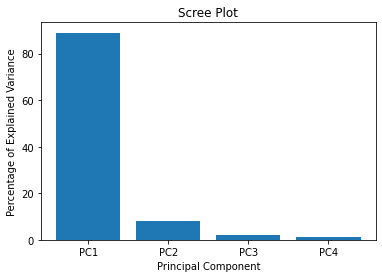

In [29]:
from sklearn.decomposition import PCA
pc = PCA(n_components=4)
principalComponents = pc.fit_transform(X)
per_var = np.round(pc.explained_variance_ratio_* 100, decimals=0)

labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels,  align="center")
#plt.xticks(range(1, len(principalComponents)+1), principalComponents) 
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [30]:
print(per_var)

[89.  8.  2.  1.]


In [31]:
# Feature Extraction using PCA:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principal_Df.head()

,principal component 1,principal component 2
0,19.750406,-0.181903
1,19.717748,-0.171022
2,19.688908,-0.161961
3,19.507050,-0.139359
4,19.480181,-0.132144


In [32]:
principal_Df.index = np.arange(1, len(principal_Df)+1)
principal_Df

,principal component 1,principal component 2
1,19.750406,-0.181903
2,19.717748,-0.171022
3,19.688908,-0.161961
4,19.507050,-0.139359
5,19.480181,-0.132144
...,...,...
627296,-1.207331,-0.042867
627297,-1.216286,-0.041085
627298,-1.234473,-0.040035
627299,-1.252088,-0.038781


In [33]:
ds_new.label

1            Benign
2            Benign
3            Benign
4            Benign
5            Benign
            ...    
627296    Malignant
627297    Malignant
627298    Malignant
627299    Malignant
627300    Malignant
Name: label, Length: 627300, dtype: object

In [34]:
Df_new = pd.concat([principal_Df, ds_new.label], axis = 1)
Df_new.head()

Df_new1=Df_new
Df_new1['label'].replace(0, 'Benign',inplace=True)
Df_new1['label'].replace(1, 'Malignant',inplace=True)

<Figure size 432x288 with 0 Axes>

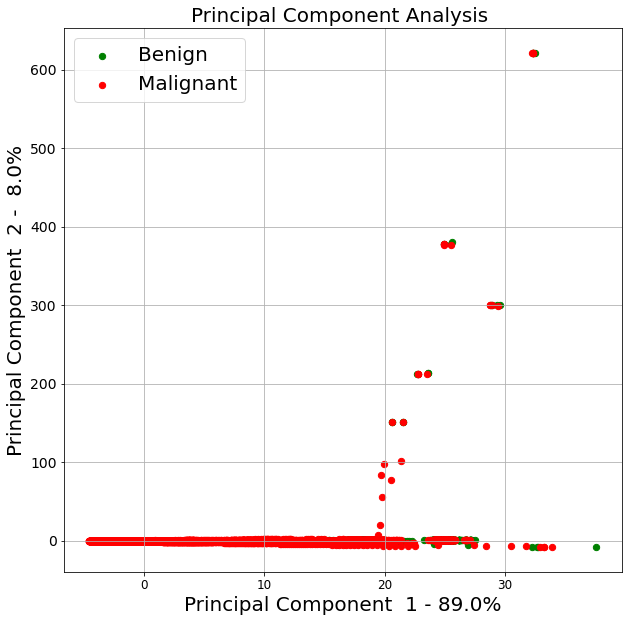

In [35]:

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component  1 - {0}%'.format(per_var[0]),fontsize=20)
plt.ylabel('Principal Component  2 -  {0}%'.format(per_var[1]),fontsize=20)
plt.title("Principal Component Analysis ",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = Df_new['label'] == target
    plt.scatter(principal_Df.loc[indicesToKeep, 'principal component 1']
               , principal_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 40)

plt.legend(targets,prop={'size': 20})
plt.grid()

In [36]:
Df_new.columns=["X"+str(i) for i in range(0, 3)]
Df_new.rename(columns={'X2' : 'label'}, inplace = True)
#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
Df_new.head()

,X0,X1,label
1,19.750406,-0.181903,Benign
2,19.717748,-0.171022,Benign
3,19.688908,-0.161961,Benign
4,19.507050,-0.139359,Benign
5,19.480181,-0.132144,Benign


In [37]:
Df_new1=Df_new
Df_new1['label'].replace('Benign', 0,inplace=True)
Df_new1['label'].replace('Malignant', 1,inplace=True)
Df_new1.reset_index(drop=True)

,X0,X1,label
0,19.750406,-0.181903,0
1,19.717748,-0.171022,0
2,19.688908,-0.161961,0
3,19.507050,-0.139359,0
4,19.480181,-0.132144,0
...,...,...,...
627295,-1.207331,-0.042867,1
627296,-1.216286,-0.041085,1
627297,-1.234473,-0.040035,1
627298,-1.252088,-0.038781,1


# (Model-1) LOGISTIC REGRESSION


In [38]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [39]:
X = Df_new1.iloc[:, 0:2].values
y=Df_new1.label.values
X

array([[19.75040628, -0.18190332],
       [19.71774847, -0.17102178],
       [19.68890766, -0.16196123],
       ...,
       [-1.23447296, -0.04003472],
       [-1.25208795, -0.0387814 ],
       [-1.26576503, -0.03750012]])

In [40]:
from sklearn.preprocessing import StandardScaler
# Dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [41]:
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[1 1 1 ... 1 1 1]
binary
binary
binary


In [42]:
## Fitting Logisitic regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print("LogisticRegression")

LogisticRegression


In [43]:
# Predicting the Train set results
y_trainpred = classifier.predict(X_train)
print(y_trainpred)

# model accuracy for the predicted value   
from sklearn.metrics import accuracy_score
print ("Accuracy is",  accuracy_score(y_train,y_trainpred)*100)


#Test MSE
print ('Test MSE: ', mean_squared_error(y_train, y_trainpred))

#Root_Mean_Squared_Error:
print ('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_train,y_trainpred)))


[1 0 1 ... 1 1 1]
Accuracy is 94.24244494545786
Test MSE:  0.05757555054542142
Root_Mean_Squared_Error :  0.23994905822991142


In [44]:
#Classification report of logistic regression

print("Classification report :")
print(classification_report(y_train,y_trainpred))

Classification report :
              precision    recall  f1-score   support

           0       0.62      0.78      0.69     36485
           1       0.98      0.96      0.97    402625

    accuracy                           0.94    439110
   macro avg       0.80      0.87      0.83    439110
weighted avg       0.95      0.94      0.95    439110



In [45]:
# Predicting the Test set results
y_testpred = classifier.predict(X_test)
print(y_testpred)

# model accuracy for the predicted value   
from sklearn.metrics import accuracy_score
print ("Accuracy is",  accuracy_score(y_test,y_testpred)*100)

#Test MSE
print ('Test MSE: ', mean_squared_error(y_test, y_testpred))


print ('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_test,y_testpred)))



[1 1 1 ... 1 1 0]
Accuracy is 94.19257133747809
Test MSE:  0.05807428662521919
Root_Mean_Squared_Error :  0.24098607143405446


In [46]:
#Classification report of logisitic regression - test set

print("Classification report :")
print(classification_report(y_test,y_testpred))

Classification report :
              precision    recall  f1-score   support

           0       0.62      0.78      0.69     15788
           1       0.98      0.96      0.97    172402

    accuracy                           0.94    188190
   macro avg       0.80      0.87      0.83    188190
weighted avg       0.95      0.94      0.94    188190



In [47]:
#confusion matrix of Logistic Regression
cm = pd.DataFrame(confusion_matrix(y_test, y_testpred).T)
cm.index.name = 'Predicted'
cm.columns.name = 'Actual'
cm

Actual,0,1
Predicted,,
0,12258,7399
1,3530,165003


# (Model-2) DECISION TREE CLASSIFIER

In [48]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
import io
from io import StringIO
from IPython.display import Image 
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from pydotplus import graphviz
import pydot
from graphviz import Digraph
import pydotplus
from IPython.display import Image

In [49]:
#X has all the rows and two extracted features
X = Df_new1.iloc[:, 0:2].values
y=Df_new1.label.values


In [50]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [51]:
from sklearn.preprocessing import StandardScaler
# Dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 0)
# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [52]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

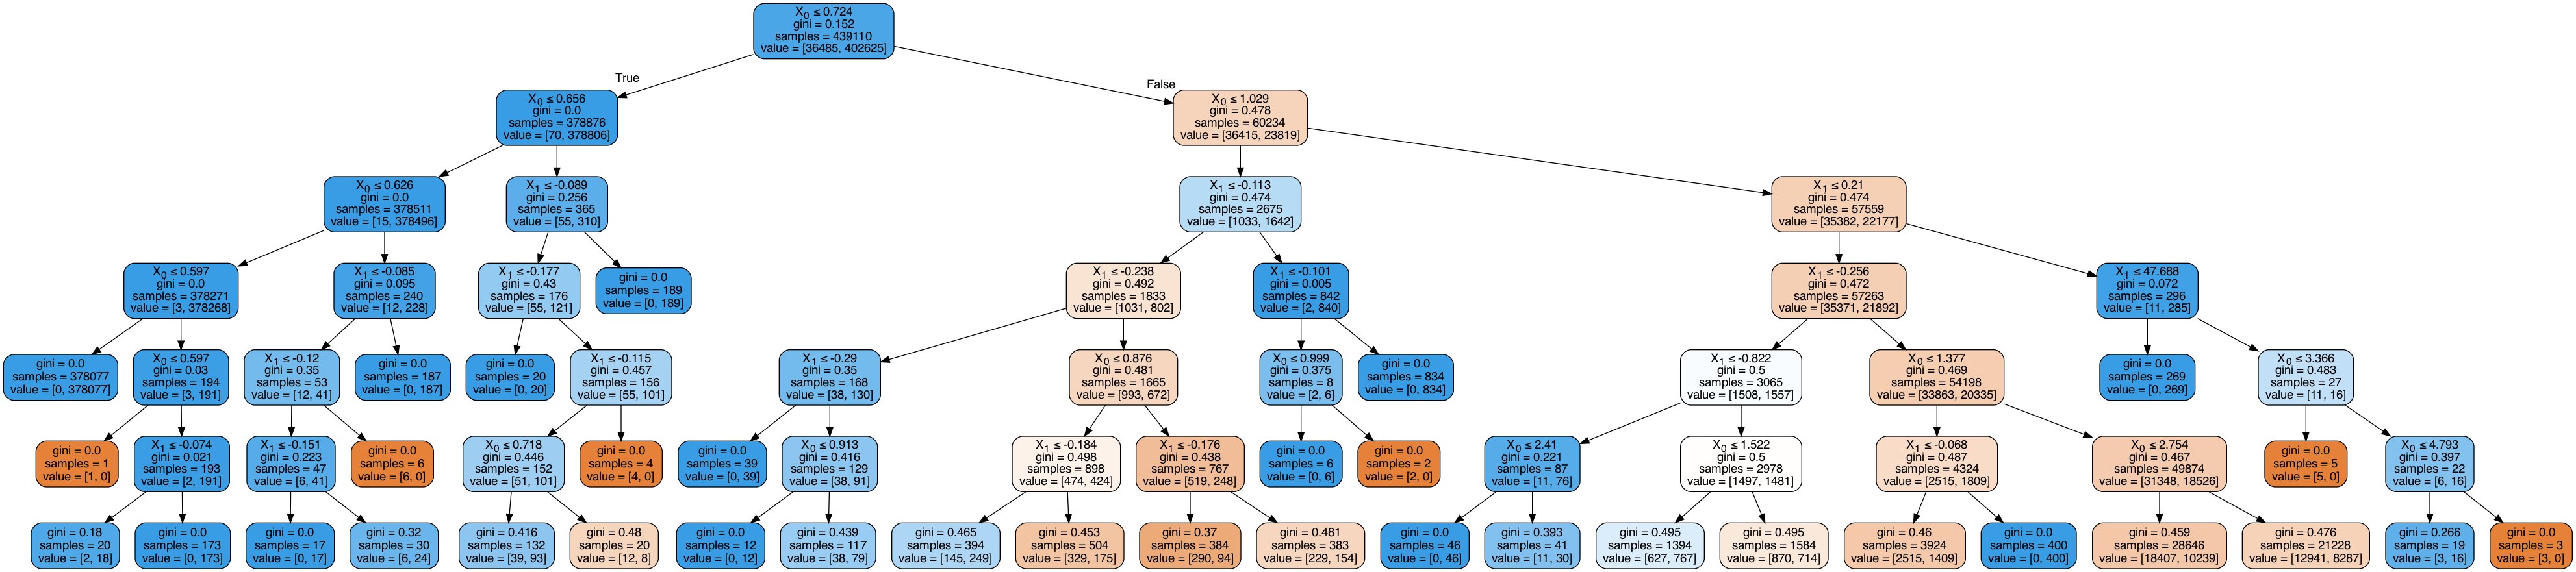

In [53]:
from sklearn import tree
from graphviz import Source


dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [54]:
#fitting the model
clf.fit(X_train, y_train)
y_trainpred = clf.predict(X_train)
print(y_trainpred)


### ***Train Set*** ####
# Model accuracy for the predicted value   
from sklearn.metrics import accuracy_score
print ("Accuracy is",  accuracy_score(y_train,y_trainpred)*100)


#Test MSE
print ('Test MSE: ', mean_squared_error(y_train, y_trainpred))

#Root_Mean_Squared_Error:
print ('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_train,y_trainpred)))


[1 0 1 ... 1 1 1]
Accuracy is 95.00193573364305
Test MSE:  0.04998064266356949
Root_Mean_Squared_Error :  0.22356350923970014


In [55]:
#Classification report - Decision tree classifier

print("Classification report :")
print(classification_report(y_train,y_trainpred))

Classification report :
              precision    recall  f1-score   support

           0       0.63      0.98      0.76     36485
           1       1.00      0.95      0.97    402625

    accuracy                           0.95    439110
   macro avg       0.81      0.96      0.87    439110
weighted avg       0.97      0.95      0.95    439110



In [56]:
# Predicting the Test set results
y_testpred = clf.predict(X_test)
print(y_testpred)

# model accuracy for the predicted value   
from sklearn.metrics import accuracy_score
print ("Accuracy is",  accuracy_score(y_test,y_testpred)*100)

#Test MSE
print ('Test MSE: ', mean_squared_error(y_test, y_testpred))


print ('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_test,y_testpred)))



[1 1 1 ... 1 1 0]
Accuracy is 94.49120569637068
Test MSE:  0.05508794303629311
Root_Mean_Squared_Error :  0.23470820828486827


In [57]:
#Classification report of decision tree

print("Classification report :")
print(classification_report(y_test,y_testpred))

Classification report :
              precision    recall  f1-score   support

           0       0.62      0.87      0.73     15788
           1       0.99      0.95      0.97    172402

    accuracy                           0.94    188190
   macro avg       0.81      0.91      0.85    188190
weighted avg       0.96      0.94      0.95    188190



In [58]:
#confusion matrix for decision tree
cm = pd.DataFrame(confusion_matrix(y_test, y_testpred).T)
cm.index.name = 'Predicted'
cm.columns.name = 'Actual'
cm

Actual,0,1
Predicted,,
0,13735,8314
1,2053,164088


### Pruning the Decision tree classifier

In [59]:
from sklearn.model_selection import KFold, cross_val_score

SCORES = []
max_leafs_arr = range(2, 50)
for max_leafs in max_leafs_arr:
    regressionTree = DecisionTreeClassifier(max_leaf_nodes=max_leafs)
    sc = cross_val_score(regressionTree, X, y, cv=10, scoring="neg_mean_squared_error")
    SCORES.append((-sc.mean(), sc.std()))
SCORES = np.array(SCORES)

The best tree has 28 leafs.


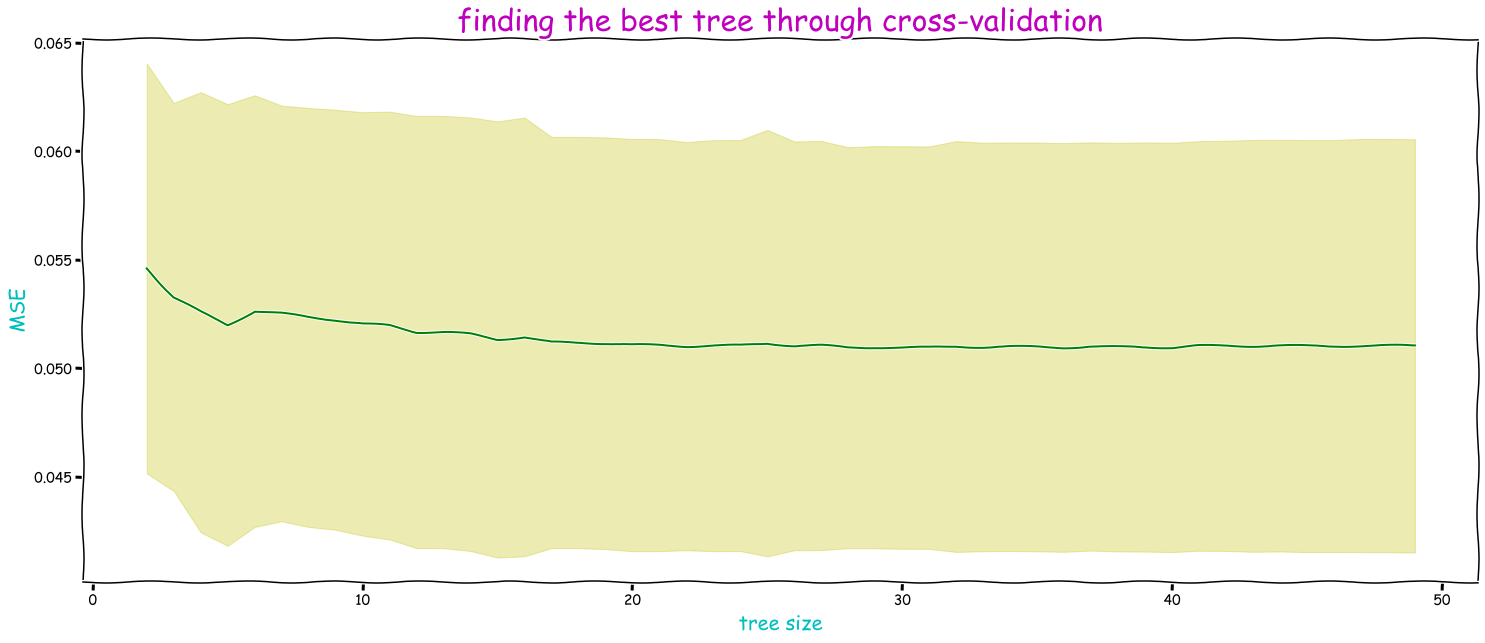

In [60]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(max_leafs_arr, SCORES[:,0], 'g')
plt.fill_between(max_leafs_arr, SCORES[:,0]+SCORES[:,1], SCORES[:,0]-SCORES[:,1], alpha=0.3, color='y')
plt.xlabel('tree size', fontsize=20, color='c')
plt.ylabel('MSE', fontsize=20, color='c')
plt.title('finding the best tree through cross-validation', fontsize=30, color='m')
best_min_leafs = max_leafs_arr[np.argmin(SCORES[:,0])]
print(f"The best tree has {best_min_leafs} leafs.")

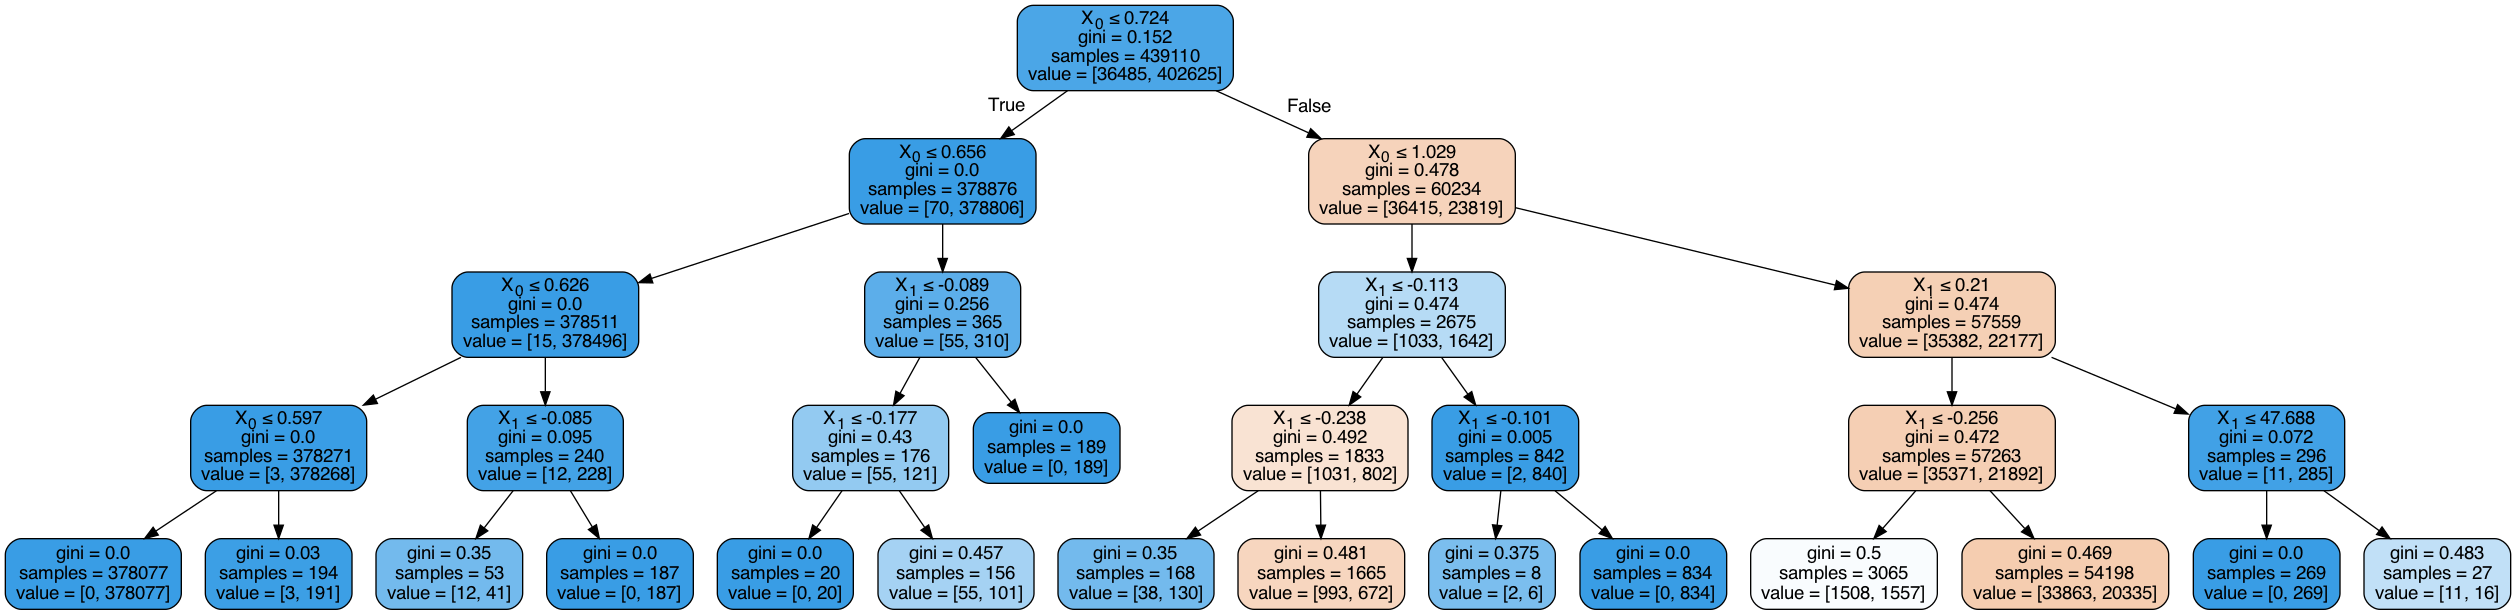

In [61]:
tree_cs = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)

dot_data = StringIO()

export_graphviz(tree_cs, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=250000)

In [62]:
# Predicting the Test set results
y_testpred = tree_cs.predict(X_test)
print(y_testpred)

# model accuracy for the predicted value   
from sklearn.metrics import accuracy_score
print ("Accuracy is",  accuracy_score(y_test,y_testpred)*100)

#Test MSE
print ('Test MSE: ', mean_squared_error(y_test, y_testpred))


print ('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_test,y_testpred)))


[1 1 1 ... 1 0 1]
Accuracy is 94.04006589085499
Test MSE:  0.05959934109145013
Root_Mean_Squared_Error :  0.2441297628136523


# (Model-3) SVM - Support Vector Machine - Classification

In [63]:
#importing libraries
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import utils
from sklearn.preprocessing import StandardScaler

In [64]:
# set of datapoints are selected to train the model
X = Df_new1.iloc[30000:160000, 0:2].values

y=Df_new1.label[30000:160000].values


In [65]:
# Dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [66]:

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[1 1 1 ... 1 1 1]
binary
binary
binary


In [67]:
#C is a hyper-parameter
C = 1.0 
# training a linear SVM classifier
svm_model_linear = SVC(kernel = 'linear', C=C).fit(X_train,training_scores_encoded)

In [68]:
# Predicting the Train set results
y_trainpred = svm_model_linear.predict(X_train)

print(y_trainpred)


# model accuracy for the predicted value   
from sklearn.metrics import accuracy_score
print ("Accuracy is",  accuracy_score(y_train,y_trainpred)*100)


#Test MSE
print ('Test MSE: ', mean_squared_error(y_train, y_trainpred))

#Root_Mean_Squared_Error:
print ('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_train,y_trainpred)))

[0 1 1 ... 1 1 1]
Accuracy is 93.15576923076922
Test MSE:  0.06844230769230769
Root_Mean_Squared_Error :  0.2616148078613053


In [69]:
#Classification report of svm

print("Classification report :")
print(classification_report(y_train,y_trainpred))

Classification report :
              precision    recall  f1-score   support

           0       0.75      0.90      0.82     17825
           1       0.98      0.94      0.96     86175

    accuracy                           0.93    104000
   macro avg       0.86      0.92      0.89    104000
weighted avg       0.94      0.93      0.93    104000



In [70]:
# Predicting the Test set results
y_testpred = svm_model_linear.predict(X_test)
print(y_testpred)

# model accuracy for the predicted value   
from sklearn.metrics import accuracy_score
print ("Accuracy is",  accuracy_score(y_test,y_testpred)*100)

#Test MSE
print ('Test MSE: ', mean_squared_error(y_test, y_testpred))


print ('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_test,y_testpred)))



[0 1 1 ... 1 1 1]
Accuracy is 93.23076923076923
Test MSE:  0.06769230769230769
Root_Mean_Squared_Error :  0.26017745423519634


In [71]:
#Classification report of svm

print("Classification report :")
print(classification_report(y_test,y_testpred))

Classification report :
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      4448
           1       0.98      0.94      0.96     21552

    accuracy                           0.93     26000
   macro avg       0.87      0.92      0.89     26000
weighted avg       0.94      0.93      0.93     26000



In [72]:
#confusion matrix for SVM
cm = pd.DataFrame(confusion_matrix(y_test, y_testpred).T)
cm.index.name = 'Predicted'
cm.columns.name = 'Actual'
cm

Actual,0,1
Predicted,,
0,4008,1320
1,440,20232


# (Model-4) KNN CLASSIFIER

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = Df_new1.iloc[:, 0:2].values
y=Df_new1.label.values

In [74]:
# Dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 42)
# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [75]:
# Predicting the Train set results
y_trainpred = knn.predict(X_train)

print(y_trainpred)


# model accuracy for the predicted value   
from sklearn.metrics import accuracy_score
print ("Accuracy is",  accuracy_score(y_train,y_trainpred)*100)


#Test MSE
print ('Test MSE: ', mean_squared_error(y_train, y_trainpred))

#Root_Mean_Squared_Error:
print ('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_train,y_trainpred)))

[1 1 1 ... 1 1 1]
Accuracy is 95.62023183257043
Test MSE:  0.043797681674295735
Root_Mean_Squared_Error :  0.2092789565969205


In [76]:
#Classification report of KNN

print("Classification report :")
print(classification_report(y_train,y_trainpred))

Classification report :
              precision    recall  f1-score   support

           0       0.69      0.87      0.77     36520
           1       0.99      0.96      0.98    402590

    accuracy                           0.96    439110
   macro avg       0.84      0.92      0.87    439110
weighted avg       0.96      0.96      0.96    439110



In [77]:
# Predicting the Test set results
y_testpred = knn.predict(X_test)
print(y_testpred)

# model accuracy for the predicted value   
from sklearn.metrics import accuracy_score
print ("Accuracy is",  accuracy_score(y_test,y_testpred)*100)

#Test MSE
print ('Test MSE: ', mean_squared_error(y_test, y_testpred))


print ('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_test,y_testpred)))



[1 1 1 ... 1 1 1]
Accuracy is 94.53265316966896
Test MSE:  0.054673468303310484
Root_Mean_Squared_Error :  0.2338235837192444


In [78]:
#Classification report  of KNN

print("Classification report :")
print(classification_report(y_test,y_testpred))

Classification report :
              precision    recall  f1-score   support

           0       0.63      0.83      0.72     15753
           1       0.98      0.96      0.97    172437

    accuracy                           0.95    188190
   macro avg       0.81      0.89      0.84    188190
weighted avg       0.95      0.95      0.95    188190



In [79]:
#confusion matrix of KNN
cm = pd.DataFrame(confusion_matrix(y_test, y_testpred).T)
cm.index.name = 'Predicted'
cm.columns.name = 'Actual'
cm

Actual,0,1
Predicted,,
0,13057,7593
1,2696,164844


# Optimization of KNN-Algorithm

#### Random Search for Hyper-Parameter Optimization

In [80]:
## Optimizing Hyper Parameter by Random Search Cross validation

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_neighbors': range(1,20),
}
n_iter_search=10
clf = KNeighborsClassifier()
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=10,scoring='accuracy')
Random.fit(X_train, y_train)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'n_neighbors': 10}
Accuracy:0.9482157090478467


#### Optimizing KNN model using Grid Search CV

In [81]:
## ptimizing KNN model using Grid Search CV

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
# Select an algorithm
algorithm = KNeighborsClassifier()
# Create 3 folds
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [15,18,20,16,17], 'weights': ['uniform','distance']}]
# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='accuracy')
grid.fit(X_train, y_train)
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.9486939491243652
KNeighborsClassifier(n_neighbors=20)
{'n_neighbors': 20, 'weights': 'uniform'}


## Fine Tuning Hyper-parameter of Logistic Regression using GridSearch CV

In [82]:
X = Df_new1.iloc[:, 0:2].values
y=Df_new1.label.values
X

from sklearn.preprocessing import StandardScaler
# Dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.942422172120881


In [84]:
# Predicting the Test set results
y_testpred = logreg_cv.predict(X_test)
print(y_testpred)


#confusion matrix of tuned Logistic Regression
cm = pd.DataFrame(confusion_matrix(y_test, y_testpred).T)
cm.index.name = 'Predicted'
cm.columns.name = 'Actual'
cm

[1 1 1 ... 1 1 0]


Actual,0,1
Predicted,,
0,12258,7398
1,3530,165004
